### We will analyze the share price of axis bank and will try to predict the same .

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [4]:
df = pd.read_csv('AXISBANK365.csv')

In [5]:
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,18-Oct-2019,710.30,709.85,715.7,705.25,710.35,709.55,710.02,9500635,6.745626e+09,104518,2654760,27.94
1,AXISBANK,EQ,22-Oct-2019,709.55,712.40,723.0,703.30,713.25,712.75,715.70,9704016,6.945190e+09,173046,3447622,35.53


In [6]:
df['Date'].dtype

dtype('O')

In [7]:
df['Date'] = pd.to_datetime(df.Date)

In [8]:
df['Date'][:2]

0   2019-10-18
1   2019-10-22
Name: Date, dtype: datetime64[ns]

In [9]:
df['Date'].dtype

dtype('<M8[ns]')

In [10]:
df.index = df['Date']

In [11]:
df.index[:2]

DatetimeIndex(['2019-10-18', '2019-10-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2019-10-18,AXISBANK,EQ,2019-10-18,710.30,709.85,715.7,705.25,710.35,709.55,710.02,9500635,6.745626e+09,104518,2654760,27.94
2019-10-22,AXISBANK,EQ,2019-10-22,709.55,712.40,723.0,703.30,713.25,712.75,715.70,9704016,6.945190e+09,173046,3447622,35.53


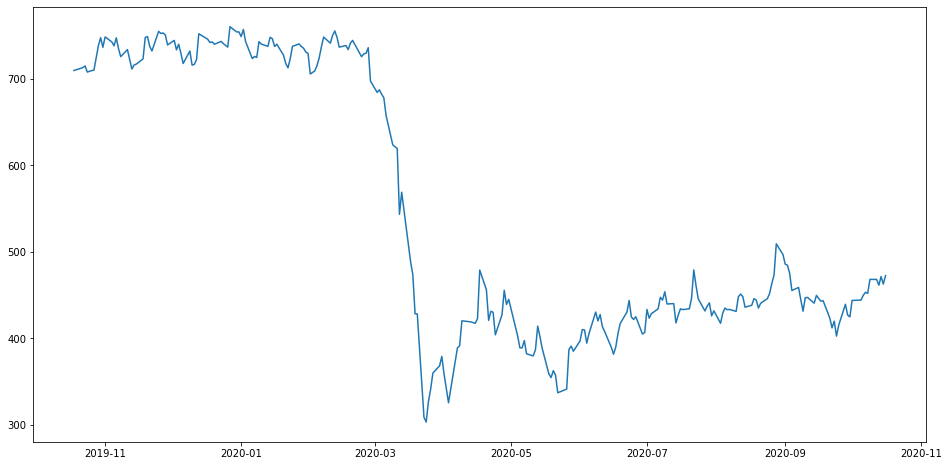

In [13]:
plt.figure(figsize=(16,8))
plt.plot(df['Close Price'],label='Close Price History')
#plt.plot(df['Open Price'],label='Close Price History')
#plt.plot(df['High Price'],label='Close Price History')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Prev Close,250.0,5.481396e+02,1.532098e+02,3.031500e+02,4.251000e+02,4.544750e+02,7.292875e+02,7.601500e+02
Open Price,250.0,5.488254e+02,1.524535e+02,2.935000e+02,4.266250e+02,4.537000e+02,7.292250e+02,7.609000e+02
High Price,250.0,5.584824e+02,1.505978e+02,3.375000e+02,4.358250e+02,4.636000e+02,7.377000e+02,7.658500e+02
Low Price,250.0,5.374530e+02,1.543275e+02,2.860000e+02,4.154750e+02,4.457000e+02,7.219250e+02,7.514000e+02
Last Price,250.0,5.474640e+02,1.526647e+02,3.048000e+02,4.260000e+02,4.534000e+02,7.295750e+02,7.609000e+02
Close Price,250.0,5.471880e+02,1.529371e+02,3.031500e+02,4.251000e+02,4.544750e+02,7.292875e+02,7.601500e+02
Average Price,250.0,5.478476e+02,1.525749e+02,3.114100e+02,4.250700e+02,4.531800e+02,7.294475e+02,7.583200e+02
Total Traded Quantity,250.0,2.447318e+07,1.750981e+07,9.657720e+05,8.974205e+06,2.069700e+07,3.548943e+07,9.619027e+07
Turnover,250.0,1.135256e+10,6.356480e+09,6.869613e+08,6.457189e+09,9.624594e+09,1.475122e+10,4.223716e+10
No. of Trades,250.0,2.571650e+05,1.644034e+05,1.552600e+04,1.320158e+05,2.088945e+05,3.504938e+05,9.907370e+05


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2019-10-18 to 2020-10-16
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  250 non-null    object        
 1   Series                  250 non-null    object        
 2   Date                    250 non-null    datetime64[ns]
 3   Prev Close              250 non-null    float64       
 4   Open Price              250 non-null    float64       
 5   High Price              250 non-null    float64       
 6   Low Price               250 non-null    float64       
 7   Last Price              250 non-null    float64       
 8   Close Price             250 non-null    float64       
 9   Average Price           250 non-null    float64       
 10  Total Traded Quantity   250 non-null    int64         
 11  Turnover                250 non-null    float64       
 12  No. of Trades           250 non

In [16]:
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2019-10-18,AXISBANK,EQ,2019-10-18,710.30,709.85,715.7,705.25,710.35,709.55,710.02,9500635,6.745626e+09,104518,2654760,27.94
2019-10-22,AXISBANK,EQ,2019-10-22,709.55,712.40,723.0,703.30,713.25,712.75,715.70,9704016,6.945190e+09,173046,3447622,35.53


In [17]:
data = df.sort_index(ascending=True,axis=0)

In [18]:
data.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2019-10-18,AXISBANK,EQ,2019-10-18,710.30,709.85,715.7,705.25,710.35,709.55,710.02,9500635,6.745626e+09,104518,2654760,27.94
2019-10-22,AXISBANK,EQ,2019-10-22,709.55,712.40,723.0,703.30,713.25,712.75,715.70,9704016,6.945190e+09,173046,3447622,35.53


## Lets us try Auto_Arima to predict the future values.

In [19]:
from pmdarima import auto_arima

In [20]:
data.shape

(250, 15)

In [21]:
train = data[:200]
test  = data[200:]

In [22]:
training = train['Close Price']
testing  = test['Close Price']

In [23]:
training.head()

Date
2019-10-18    709.55
2019-10-22    712.75
2019-10-23    714.85
2019-10-24    707.70
2019-10-25    708.60
Name: Close Price, dtype: float64

In [24]:
model = auto_arima(training,start_p=1,start_q=1,max_p=3,max_q=3,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                   error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.01 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1757.306, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1733.560, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1758.825, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1696.779, Time=0.90 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.82 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1694.784, Time=0.71 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1731.563, Time=0.23 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.71 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1696.779, Time=1.11 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1697.767, Time=2.28 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1696.7

In [25]:
forecast = model.predict(n_periods=50)
forecast = pd.DataFrame(forecast,index=test.index,columns=['Predictions'])

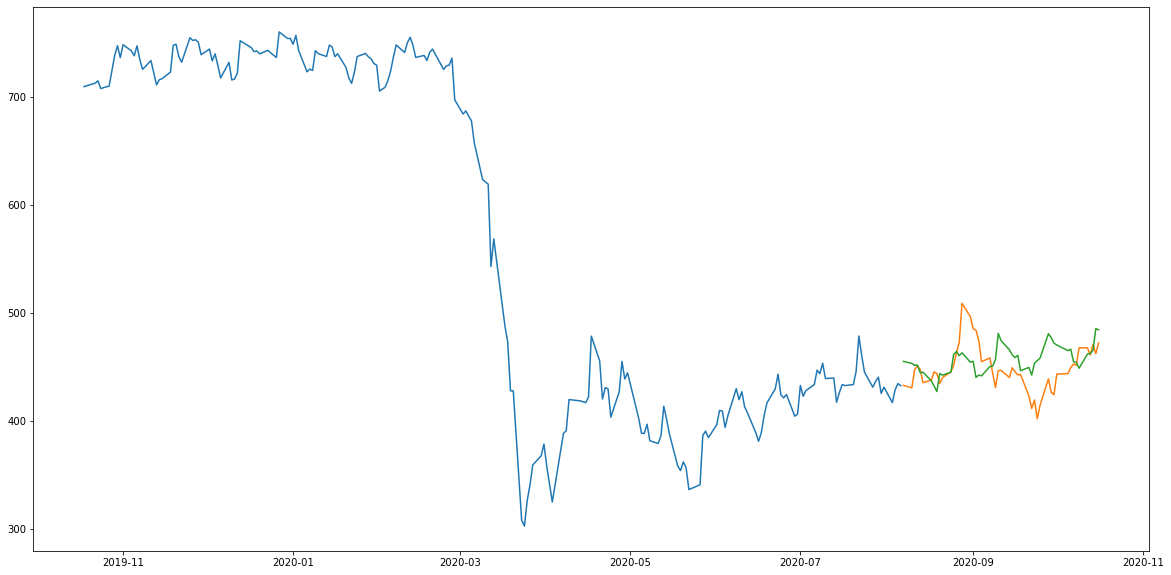

In [26]:
plt.plot(train['Close Price'])
plt.plot(test['Close Price'])
plt.plot(forecast['Predictions'])

## Lets try Prophet from fbprophet

In [27]:
from fbprophet import Prophet

In [28]:
new_data1 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])


In [29]:
for i in range(0,len(data)):
    new_data1['Date'][i] = data['Date'][i]
    new_data1['Close'][i] = data['Close Price'][i]

In [30]:
new_data1['Date'].dtype

dtype('O')

In [31]:
new_data1['Date'] = pd.to_datetime(new_data1.Date)

In [32]:
new_data1['Date'].dtype

dtype('<M8[ns]')

In [33]:
new_data1.head(2)

,Date,Close
0,2019-10-18,709.55
1,2019-10-22,712.75


In [34]:
new_data1.index = new_data1['Date']

In [35]:
new_data1.head(2)

,Date,Close
Date,,
2019-10-18,2019-10-18,709.55
2019-10-22,2019-10-22,712.75


In [36]:
new_data1.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [37]:
new_data1.head(2)

,ds,y
Date,,
2019-10-18,2019-10-18,709.55
2019-10-22,2019-10-22,712.75


In [38]:
train1 = new_data1[:200]
test1 = new_data1[200:]

In [39]:
model1 = Prophet()
model1.fit(train1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
close_prices1 = model1.make_future_dataframe(periods=len(test1))

In [41]:
forecast1 = model1.predict(close_prices1)

In [42]:
forecast1.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-18,727.061070,674.153528,787.018597,727.061070,727.061070,4.458799,4.458799,4.458799,4.458799,4.458799,4.458799,0.0,0.0,0.0,731.519869
1,2019-10-22,727.374445,678.850975,783.630308,727.374445,727.374445,4.492185,4.492185,4.492185,4.492185,4.492185,4.492185,0.0,0.0,0.0,731.866630
2,2019-10-23,727.452789,682.237598,793.048340,727.452789,727.452789,10.455151,10.455151,10.455151,10.455151,10.455151,10.455151,0.0,0.0,0.0,737.907941


In [43]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-18,727.061070,674.153528,787.018597,727.061070,727.061070,4.458799,4.458799,4.458799,4.458799,4.458799,4.458799,0.0,0.0,0.0,731.519869
1,2019-10-22,727.374445,678.850975,783.630308,727.374445,727.374445,4.492185,4.492185,4.492185,4.492185,4.492185,4.492185,0.0,0.0,0.0,731.866630
2,2019-10-23,727.452789,682.237598,793.048340,727.452789,727.452789,10.455151,10.455151,10.455151,10.455151,10.455151,10.455151,0.0,0.0,0.0,737.907941
3,2019-10-24,727.531133,683.269496,788.721381,727.531133,727.531133,10.514638,10.514638,10.514638,10.514638,10.514638,10.514638,0.0,0.0,0.0,738.045771
4,2019-10-25,727.609477,682.154553,785.410394,727.609477,727.609477,4.458799,4.458799,4.458799,4.458799,4.458799,4.458799,0.0,0.0,0.0,732.068276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2020-09-21,446.797497,385.477582,523.057266,406.279228,484.236594,8.235921,8.235921,8.235921,8.235921,8.235921,8.235921,0.0,0.0,0.0,455.033419
246,2020-09-22,447.231346,380.216344,521.855969,405.341091,486.260455,4.492185,4.492185,4.492185,4.492185,4.492185,4.492185,0.0,0.0,0.0,451.723530
247,2020-09-23,447.665194,386.373914,528.836480,404.085035,488.040444,10.455151,10.455151,10.455151,10.455151,10.455151,10.455151,0.0,0.0,0.0,458.120345
248,2020-09-24,448.099042,391.360944,530.068455,402.606006,489.837980,10.514638,10.514638,10.514638,10.514638,10.514638,10.514638,0.0,0.0,0.0,458.613681


In [44]:
forecast_test1 = forecast1['yhat'][200:]

In [45]:
forecast_test1.size

50

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
forecast_test1.head(2)

200    431.733118
201    408.791461
Name: yhat, dtype: float64

In [48]:
rms = np.sqrt(mean_squared_error(test1['y'],forecast_test1))

In [49]:
rms

28.014590754085607

In [50]:
test1.head(2)

,ds,y
Date,,
2020-08-07,2020-08-07,433.3
2020-08-10,2020-08-10,431.1


In [51]:
test1['Prophet predictions'] = forecast_test1.values
test1.shape

<ipython-input-51-d7db61f946e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Prophet predictions'] = forecast_test1.values


(50, 3)

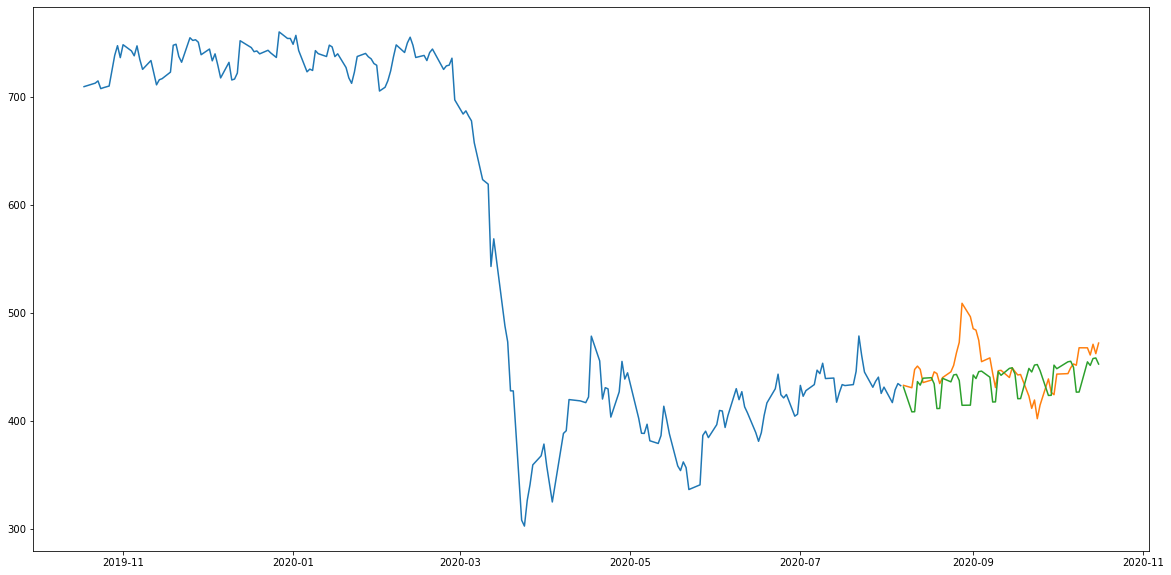

In [52]:
#Plotting
plt.plot(train1['y'])
plt.plot(test1['y'])
plt.plot(test1['Prophet predictions'])

### Prophet generally does well but in this case it isn't

## Now let us try LSTM model

In [53]:
new_data1.head(2)

,ds,y
Date,,
2019-10-18,2019-10-18,709.55
2019-10-22,2019-10-22,712.75


In [54]:
data.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2019-10-18,AXISBANK,EQ,2019-10-18,710.30,709.85,715.7,705.25,710.35,709.55,710.02,9500635,6.745626e+09,104518,2654760,27.94
2019-10-22,AXISBANK,EQ,2019-10-22,709.55,712.40,723.0,703.30,713.25,712.75,715.70,9704016,6.945190e+09,173046,3447622,35.53


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [57]:
new_data1.drop('ds',axis=1,inplace=True)

In [58]:
new_data1.head(3)

,y
Date,
2019-10-18,709.55
2019-10-22,712.75
2019-10-23,714.85


<AxesSubplot:xlabel='Date'>

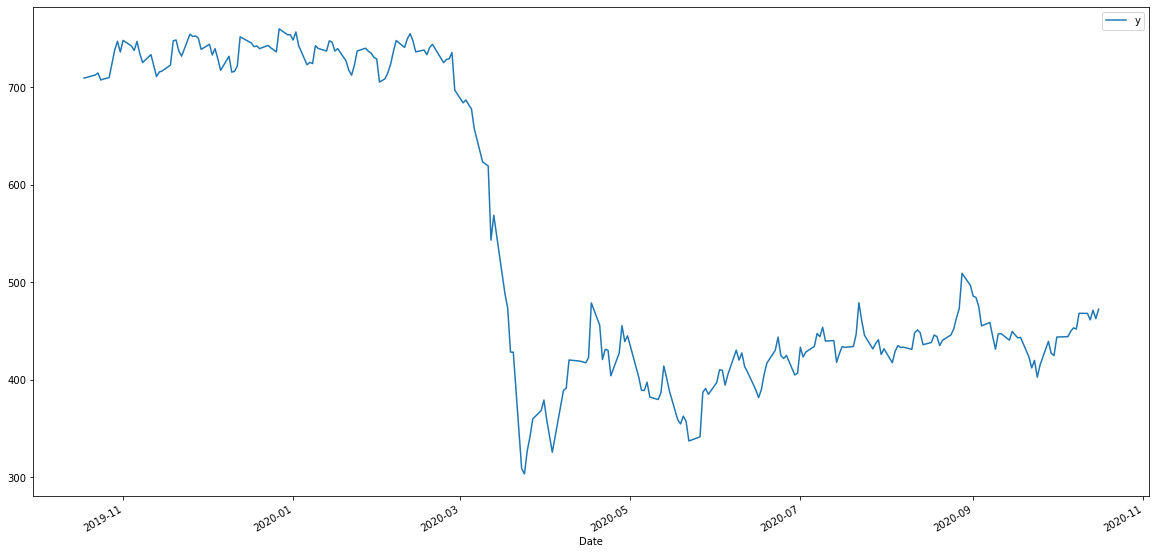

In [59]:
new_data1.plot()

In [60]:
#Splitting in into training and testing set 
len(new_data1)

250

In [61]:
test_index = 200

In [62]:
train_lstm = new_data1[:test_index]
test_lstm  = new_data1[test_index:]

In [63]:
train_lstm.shape

(200, 1)

In [64]:
test_lstm.shape

(50, 1)

In [65]:
#Preprocessing the data
scaler_lstm = MinMaxScaler()

In [66]:
scaler_lstm.fit(train_lstm)

MinMaxScaler()

In [67]:
scaled_train = scaler_lstm.transform(train_lstm)
scaled_test  = scaler_lstm.transform(test_lstm)

In [68]:
scaled_train

array([[0.8892779 ],
       [0.89628009],
       [0.90087527],
       [0.88522976],
       [0.88719912],
       [0.8904814 ],
       [0.95251641],
       [0.97210066],
       [0.94792123],
       [0.97407002],
       [0.96159737],
       [0.95164114],
       [0.97177243],
       [0.94442013],
       [0.92417943],
       [0.94212254],
       [0.8928884 ],
       [0.90317287],
       [0.90536105],
       [0.91859956],
       [0.97297593],
       [0.9750547 ],
       [0.95021882],
       [0.93862144],
       [0.98818381],
       [0.98271335],
       [0.98413567],
       [0.97910284],
       [0.95382932],
       [0.96531729],
       [0.94146608],
       [0.95557987],
       [0.93238512],
       [0.90689278],
       [0.93840263],
       [0.90273523],
       [0.90459519],
       [0.91673961],
       [0.9821663 ],
       [0.97177243],
       [0.96827133],
       [0.95995624],
       [0.96148796],
       [0.95557987],
       [0.96280088],
       [0.95733042],
       [0.94824945],
       [1.   

In [69]:
# let us produce batches of train and test using TimeSeriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
length = 20 #approx one month 
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [71]:
generator[0]

(array([[[0.8892779 ],
         [0.89628009],
         [0.90087527],
         [0.88522976],
         [0.88719912],
         [0.8904814 ],
         [0.95251641],
         [0.97210066],
         [0.94792123],
         [0.97407002],
         [0.96159737],
         [0.95164114],
         [0.97177243],
         [0.94442013],
         [0.92417943],
         [0.94212254],
         [0.8928884 ],
         [0.90317287],
         [0.90536105],
         [0.91859956]]]),
 array([[0.97297593]]))

In [72]:
generator[1]

(array([[[0.89628009],
         [0.90087527],
         [0.88522976],
         [0.88719912],
         [0.8904814 ],
         [0.95251641],
         [0.97210066],
         [0.94792123],
         [0.97407002],
         [0.96159737],
         [0.95164114],
         [0.97177243],
         [0.94442013],
         [0.92417943],
         [0.94212254],
         [0.8928884 ],
         [0.90317287],
         [0.90536105],
         [0.91859956],
         [0.97297593]]]),
 array([[0.9750547]]))

In [73]:
len(generator)

180

In [74]:
n_features = 1

In [75]:
model1 = Sequential()
model1.add(LSTM(100,return_sequences=True,input_shape=(length,n_features)))
model1.add(LSTM(100,))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mse')

In [76]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and creating Validation Generator

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
early_stop = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [79]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [80]:
model1.fit(generator,epochs=20,verbose=1,callbacks=[early_stop],validation_data=validation_generator)

Epoch 1/20
180/180 [==============================] - 7s 41ms/step - loss: 0.0264 - val_loss: 0.0019
Epoch 2/20
180/180 [==============================] - 5s 31ms/step - loss: 0.0090 - val_loss: 0.0015
Epoch 3/20
180/180 [==============================] - 6s 34ms/step - loss: 0.0059 - val_loss: 0.0014
Epoch 4/20
180/180 [==============================] - 6s 34ms/step - loss: 0.0039 - val_loss: 0.0025
Epoch 5/20
180/180 [==============================] - 6s 34ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 6/20
180/180 [==============================] - 6s 33ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 7/20
180/180 [==============================] - 6s 34ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 8/20
180/180 [==============================] - 6s 34ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 9/20
180/180 [==============================] - 6s 31ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 10/20
180/180 [==============================] - 4s 25ms/step - loss: 0.0033 - val_lo

In [81]:
losses = pd.DataFrame(model1.history.history)

<AxesSubplot:>

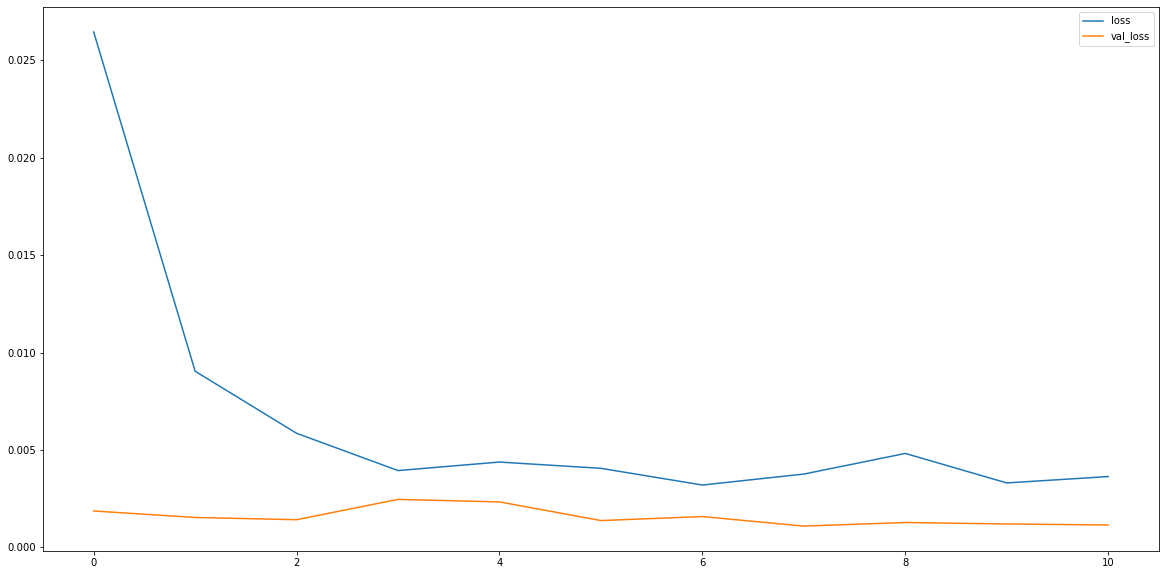

In [82]:
losses.plot()

### Evaluation on test Data

In [83]:
first_eval_batch = scaled_train[-length:]

In [84]:
first_eval_batch

array([[0.29857768],
       [0.29956236],
       [0.25065646],
       [0.2702407 ],
       [0.28632385],
       [0.28435449],
       [0.28632385],
       [0.31301969],
       [0.38468271],
       [0.34507659],
       [0.31170678],
       [0.2809628 ],
       [0.29299781],
       [0.30142232],
       [0.26849015],
       [0.28118162],
       [0.24989059],
       [0.27571116],
       [0.28840263],
       [0.28413567]])

In [85]:
first_eval_batch = first_eval_batch.reshape(1,length,n_features)

In [86]:
model1.predict(first_eval_batch)[0]

array([0.2793143], dtype=float32)

In [87]:
scaled_test[0]

array([0.28479212])

In [88]:
#will put the above code in loop to predict for all the future test set

In [89]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(scaled_test)):
    
    current_pred = model1.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[scaled_test[i]]],axis=1)
    

In [90]:
[[scaled_test[i]]]

[[array([0.37035011])]]

In [91]:
test_predictions[-1]

array([0.36476195], dtype=float32)

In [92]:
true_predictions = scaler_lstm.inverse_transform(test_predictions)

In [93]:
true_predictions.shape

(50, 1)

In [94]:
new_data1.head()

,y
Date,
2019-10-18,709.55
2019-10-22,712.75
2019-10-23,714.85
2019-10-24,707.7
2019-10-25,708.6


In [95]:
test_lstm.head()

,y
Date,
2020-08-07,433.3
2020-08-10,431.1
2020-08-11,448
2020-08-12,451.1
2020-08-13,448.1


In [96]:
test_lstm['Lstm Predictions'] = true_predictions

<ipython-input-96-ad57756ad8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_lstm['Lstm Predictions'] = true_predictions


In [97]:
test_lstm.head()

,y,Lstm Predictions
Date,,
2020-08-07,433.3,430.796639
2020-08-10,431.1,433.680821
2020-08-11,448,435.300443
2020-08-12,451.1,440.474607
2020-08-13,448.1,446.657852


<AxesSubplot:xlabel='Date'>

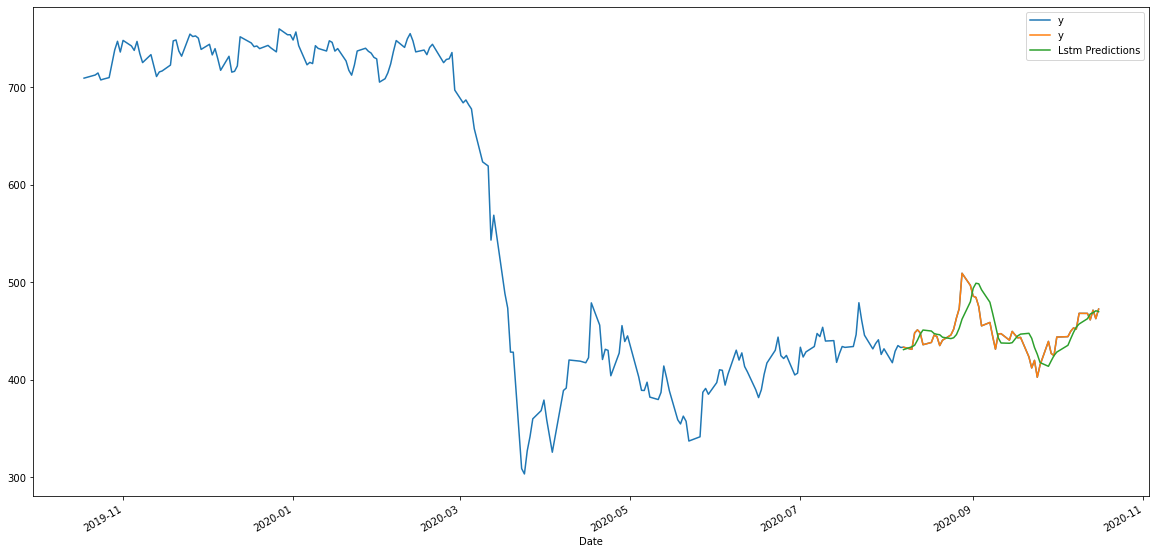

In [98]:
ax = new_data1.plot()
test_lstm.plot(ax=ax)

In [99]:
test_lstm.head()

,y,Lstm Predictions
Date,,
2020-08-07,433.3,430.796639
2020-08-10,431.1,433.680821
2020-08-11,448,435.300443
2020-08-12,451.1,440.474607
2020-08-13,448.1,446.657852


In [100]:
length

20

We will try an LSTM model with just one LSTM layer and 20 cells

In [101]:
model2 = Sequential()
model2.add(LSTM(20,input_shape=(length,n_features)))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

early_stop = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)
model2.fit(generator,epochs=20,verbose=1,callbacks=[early_stop],validation_data=validation_generator)


Epoch 1/20
180/180 [==============================] - 5s 26ms/step - loss: 0.0347 - val_loss: 0.0019
Epoch 2/20
180/180 [==============================] - 2s 13ms/step - loss: 0.0090 - val_loss: 0.0030
Epoch 3/20
180/180 [==============================] - 2s 13ms/step - loss: 0.0073 - val_loss: 0.0015
Epoch 4/20
180/180 [==============================] - 3s 14ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 5/20
180/180 [==============================] - 2s 11ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 6/20
180/180 [==============================] - 2s 11ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 7/20
180/180 [==============================] - 2s 10ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 8/20
180/180 [==============================] - 2s 11ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 9/20
180/180 [==============================] - 3s 16ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 10/20
180/180 [==============================] - 3s 14ms/step - loss: 0.0032 - val_lo

<ipython-input-102-83048bd409f4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_lstm['Pred_model2'] = true_predictions


<AxesSubplot:xlabel='Date'>

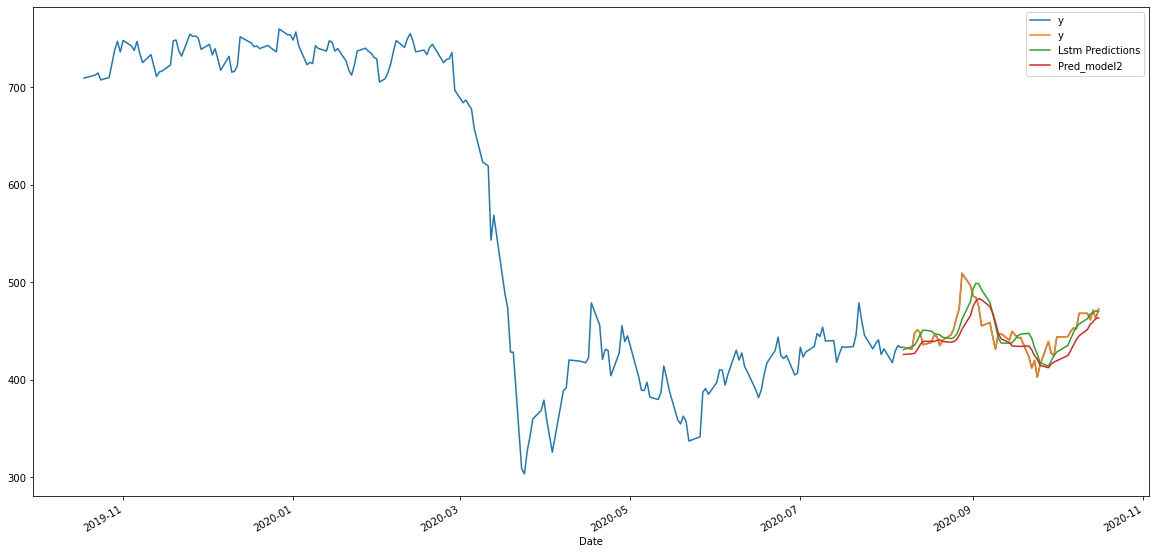

In [102]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(scaled_test)):
    
    current_pred = model2.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[scaled_test[i]]],axis=1)

true_predictions = scaler_lstm.inverse_transform(test_predictions)

test_lstm['Pred_model2'] = true_predictions

ax = new_data1.plot()
test_lstm.plot(ax=ax)

<ipython-input-103-8a7ea4739f8a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_lstm['Pred_model2_current'] = true_predictions


<AxesSubplot:xlabel='Date'>

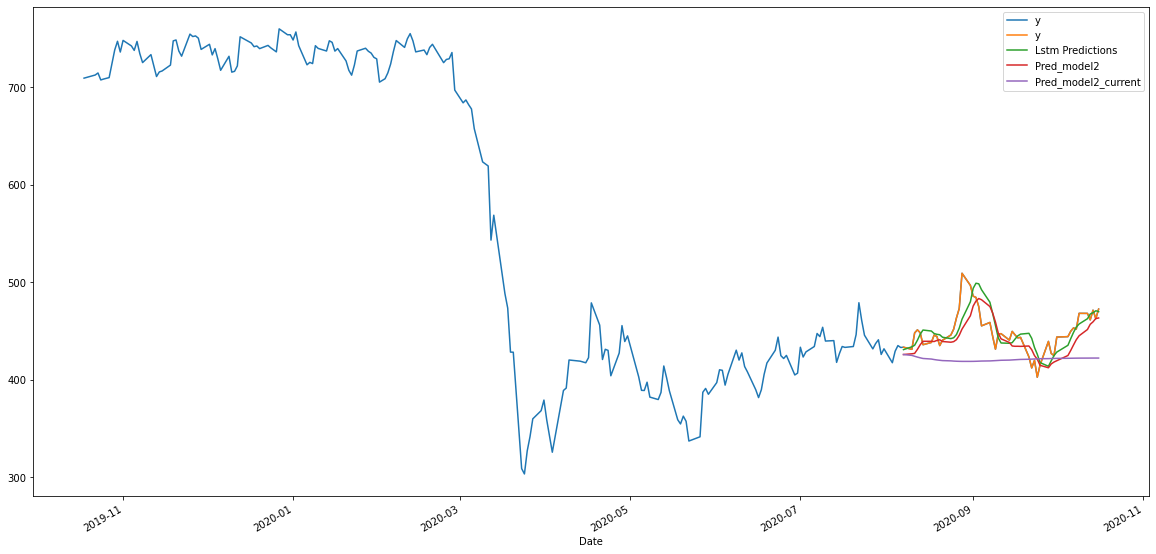

In [103]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(scaled_test)):
    
    current_pred = model2.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

true_predictions = scaler_lstm.inverse_transform(test_predictions)

test_lstm['Pred_model2_current'] = true_predictions

ax = new_data1.plot()
test_lstm.plot(ax=ax)

Thus it can be infered that the model captures the market sentiment for a day and with the real closing price can predict the next days value, this can be taken as a reference for the market trend for that share.